<a href="https://colab.research.google.com/github/Axlbenja/MiamiDadeCounty_EmployeePay_2025/blob/main/Module_2_%E2%80%94_Axel_Paredes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/Axlbenja/axel.paredes/refs/heads/main/TESLA%202010-2025.csv"
stock_data = pd.read_csv(url)

In [4]:
print(stock_data.columns)

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')


In [5]:
stock_data.columns = stock_data.columns.str.lower()

In [6]:
stock_data['date'] = pd.to_datetime(stock_data['date'])

<ipython-input-6-680aea07e192>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  stock_data['date'] = pd.to_datetime(stock_data['date'])


In [7]:
stock_data = stock_data.set_index('date')

In [8]:
#2025 being the latest year
stock_data = stock_data.tail(252)

In [9]:
stock_data.dropna(inplace=True)

In [10]:
last_price = stock_data['close'].iloc[-1]

In [11]:
#Statistical Parameters
stock_data['daily_return'] = stock_data['close'].pct_change()

In [12]:
mean_return = stock_data['daily_return'].mean()

In [13]:
volatility = stock_data['daily_return'].std() * np.sqrt(252)

In [14]:
print(f"Mean Daily Return: {mean_return:.4f}")
print(f"Annualized Volatility: {volatility:.4f}")
print(f"Last Closing Price: ${last_price:.2f}")

Mean Daily Return: 0.0030
Annualized Volatility: 0.6435
Last Closing Price: $337.80


##Monte Carlo Simulation

In [15]:
num_simulations = 1000
time_steps = 252
dt = 1 / time_steps

In [16]:
simulated_prices = np.zeros((time_steps, num_simulations))
simulated_prices[0, :] = last_price

In [17]:
for t in range(1, time_steps):
    rand = np.random.standard_normal(num_simulations)
    simulated_prices[t, :] = simulated_prices[t-1, :] * np.exp(
        (mean_return - 0.5 * volatility**2) * dt + volatility * np.sqrt(dt) * rand
    )

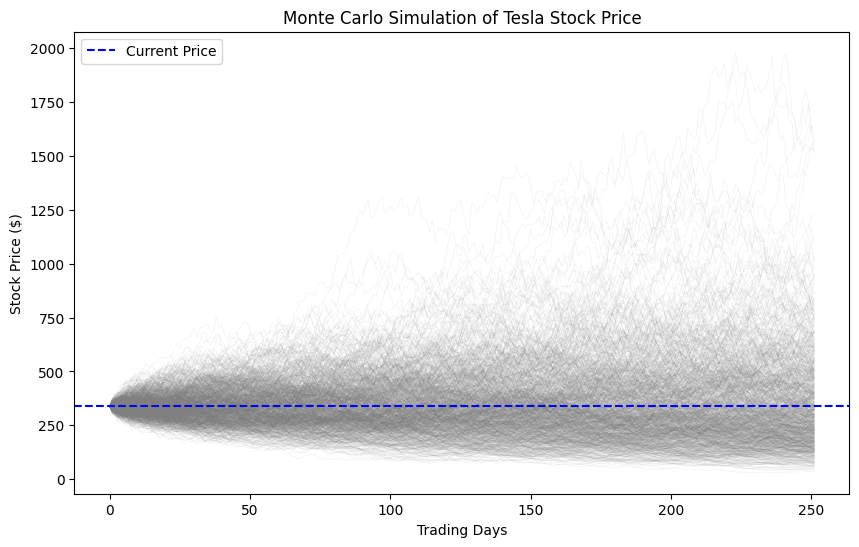

In [18]:
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(simulated_prices[:, i], color='gray', alpha=0.1, linewidth=0.5)
plt.axhline(y=last_price, color='blue', linestyle='--', label="Current Price")
plt.title("Monte Carlo Simulation of Tesla Stock Price")
plt.xlabel("Trading Days")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.show()

##Expected Price & Confidence Interval

In [19]:
expected_price = np.mean(simulated_prices[-1, :])
conf_interval = np.percentile(simulated_prices[-1, :], [2.5, 97.5])

In [20]:
results_df = pd.DataFrame({
    "Metric": ["Expected Price", "Lower Bound (95% CI)", "Upper Bound (95% CI)"],
    "Value ($)": [expected_price, conf_interval[0], conf_interval[1]]
})
print("\nSimulation Results:")
print(results_df)


Simulation Results:
                 Metric   Value ($)
0        Expected Price  340.690042
1  Lower Bound (95% CI)   78.390160
2  Upper Bound (95% CI)  891.077182


**Confidence Interval Interpretation**
The 95% confidence interval means we’re 95% sure Tesla’s stock price will land between $87.02 and $1106.53 after a year, based on the simulation. It shows the range of likely outcomes, factoring in volatility and randomness, but doesn’t guarantee the exact price.

##Summary Report

- The mean predicted stock price of $355.74 suggests where Tesla’s price might end up on average after a year, based on its past performance.

- Risk of a price drop? The lower bound of the confidence interval ($87.02)  shows a possible decline anything below {last_price:.2f} is a loss, and the wider the range, the riskier it gets.

- Traders can use this to weigh risks and rewards. If the expected price is higher than now, it might be a buy signal, but the confidence interval warns of potential dips. Investors could set stop-losses or diversify based on this.

- Limitation: Monte Carlo assumes past trends (mean return and volatility) hold up, but sudden events—like a Tesla recall or market crash—can throw it off completely.

#Bonus Challenge (Optional - 1 Extra Points)
##Modify the simulation to:

Include multiple stocks (e.g., TSLA, AMZN) and compare forecasts.
Use Monte Carlo to price a European Call Option based on your forecasted stock prices.
Test different numbers of simulations (e.g., 5000 instead of 1000) and compare results.


In [21]:
urls = {
    "TSLA": "https://raw.githubusercontent.com/Axlbenja/axel.paredes/refs/heads/main/TESLA%202010-2025.csv",
    "AMZN": "https://raw.githubusercontent.com/Axlbenja/axel.paredes/refs/heads/main/AMZN%201997-2025.csv"
}

stocks = {}

for ticker, url in urls.items():
    stock_data = pd.read_csv(url)
    stock_data.columns = stock_data.columns.str.lower()
    stock_data['date'] = pd.to_datetime(stock_data['date'])
    stock_data = stock_data.set_index('date')

<ipython-input-21-06d90d2251f4>:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  stock_data['date'] = pd.to_datetime(stock_data['date'])
<ipython-input-21-06d90d2251f4>:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  stock_data['date'] = pd.to_datetime(stock_data['date'])


In [22]:
 stock_data = stock_data.tail(252)

In [23]:
stock_data.dropna(inplace=True)

In [24]:
 stocks[ticker] = stock_data

#Statistical Parameters for Each Stock

In [26]:
stats = {}
for ticker, data in stocks.items():
    data['daily_return'] = data['close'].pct_change()
    mean_return = data['daily_return'].mean()
    volatility = data['daily_return'].std() * np.sqrt(252)
    last_price = data['close'].iloc[-1]

    stats[ticker] = {
        "mean_return": mean_return,
        "volatility": volatility,
        "last_price": last_price
    }

##Monte Carlo Simulation for Multiple Stocks

In [27]:
num_simulations_list = [1000, 5000]  # Testing different numbers of simulations
time_steps = 252
dt = 1 / time_steps

results = {}

for num_simulations in num_simulations_list:
    sim_data = {}

    for ticker in stocks.keys():
        last_price = stats[ticker]["last_price"]
        mean_return = stats[ticker]["mean_return"]
        volatility = stats[ticker]["volatility"]

        simulated_prices = np.zeros((time_steps, num_simulations))
        simulated_prices[0, :] = last_price

        for t in range(1, time_steps):
            rand = np.random.standard_normal(num_simulations)
            simulated_prices[t, :] = simulated_prices[t-1, :] * np.exp(
                (mean_return - 0.5 * volatility**2) * dt + volatility * np.sqrt(dt) * rand
            )

        sim_data[ticker] = simulated_prices

In [28]:
results[num_simulations] = sim_data

#Visualization of Monte Carlo Simulations

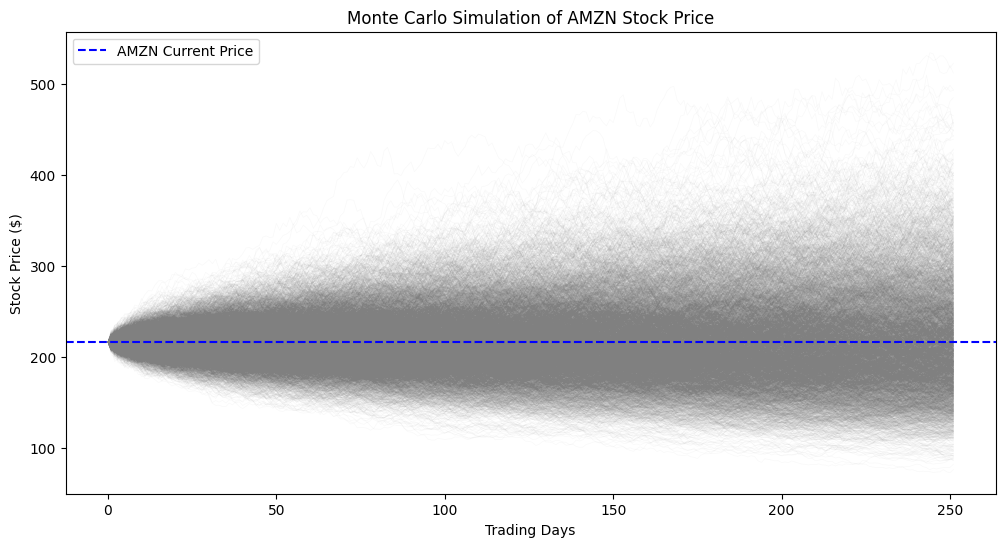

In [30]:
plt.figure(figsize=(12, 6))
for ticker in stocks.keys():
    for num_simulations in results.keys():  # Iterate over keys in 'results'
        plt.plot(results[num_simulations][ticker], color='gray', alpha=0.05, linewidth=0.5)

    plt.axhline(y=stats[ticker]["last_price"], color='blue', linestyle='--', label=f"{ticker} Current Price")
    plt.title(f"Monte Carlo Simulation of {ticker} Stock Price")
    plt.xlabel("Trading Days")
    plt.ylabel("Stock Price ($)")
    plt.legend()
    plt.show()

#European Call Option Pricing (Black-Scholes Approximation)

In [31]:
strike_price = 1.1

In [32]:
risk_free_rate = 0.02

In [34]:
option_prices = {}

for num_simulations in results.keys():
    option_data = {}

    for ticker in stocks.keys():
        final_prices = results[num_simulations][ticker][-1, :]
        last_price = stats[ticker]["last_price"]
        call_payoff = np.maximum(final_prices - (strike_price * last_price), 0)
        call_option_price = np.exp(-risk_free_rate) * np.mean(call_payoff)

        option_data[ticker] = call_option_price

    option_prices[num_simulations] = option_data

#Monte Carlo Simulation Results:

With 5000 Simulations:
  AMZN European Call Option Price: $15.51